# Assignment 2
#### Climatology and Plotting for 12 months of AVISO Altimetry data

<div class="alert alert-block alert-info">
Import Necessary Modules
</div>

In [1]:
import warnings

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

<div class="alert alert-block alert-info">
Read Data
</div>

In [2]:
file = "/project/airsea/AVISO/1993_2015_15N-15S_AVISO_SLA_ADT.nc"
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:    (latitude: 121, longitude: 1440, time: 8400)
Coordinates:
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * latitude   (latitude) float32 -14.88 -14.62 -14.38 ... 14.62 14.88 15.12
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2015-12-31
Data variables:
    sla        (time, latitude, longitude) float64 ...
    adt        (time, latitude, longitude) float64 ...
Attributes: (12/46)
    CDI:                             Climate Data Interface version 1.8.2 (ht...
    Conventions:                     CF-1.6
    history:                         Mon Aug 28 00:35:48 2017: cdo mergetime ...
    source:                          Altimetry measurements
    institution:                     CLS, CNES
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    ...                              ...
    time_coverage_end:               2016-09-24T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2016-09-24T00:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...
    History:                         Translated to CF-1.0 Conventions by Netc...
    CDO:                             Climate Data Operators version 1.8.2 (ht...

### First need to find Climatology

<div class="alert alert-block alert-info">
Initial Data
</div>

Dataset is very large, daily data from 1993-2015 with 1 degree resolution. Have to break it into smaller chunks to do the calculations

In [3]:
#Groupby month to slim the calculation
ds_monthly = ds.groupby('time.month').mean(dim='time')
ds_monthly

<xarray.Dataset>
Dimensions:    (latitude: 121, longitude: 1440, month: 12)
Coordinates:
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * latitude   (latitude) float32 -14.88 -14.62 -14.38 ... 14.62 14.88 15.12
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sla        (month, latitude, longitude) float64 0.03086 0.03214 ... nan nan
    adt        (month, latitude, longitude) float64 0.2697 0.2698 ... nan nan

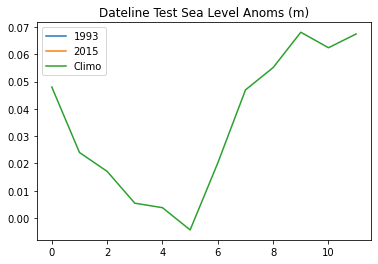

In [4]:
#Plot initial Climatology (International Date Line)
ds_climo=ds_monthly.sel(latitude=0, longitude=360-180,method='nearest')
ds_pt=ds.sel(latitude=0, longitude=360-77, method='nearest')
ds_pt1993=ds_pt.sel(time=slice('1993-01-01','1993-12-01'))
ds_pt2015=ds_pt.sel(time=slice('2015-01-01','2015-12-01'))

plt.plot(ds_pt1993['sla'])
plt.plot(ds_pt2015['sla'])
plt.plot(ds_climo['sla'])
plt.title('Dateline Test Sea Level Anoms (m)')
plt.legend(['1993','2015','Climo'])

Will circle back to this in the future. I'm assuming it isn't plotting anything because I had to define the climatology monthly?

#### Let's try plotting now

NameError: name 'fig' is not defined

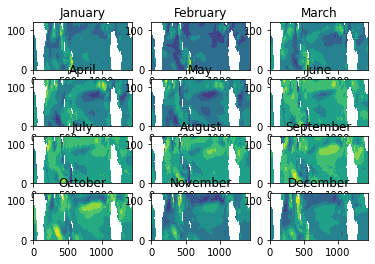

In [5]:
#Tried enumeration technique to some difficulty, so try expkicitly
#January
plt.subplot(4,3,1)
plt.contourf(ds_monthly['sla'].sel(month=1))
plt.title('January')
#February
plt.subplot(4,3,2)
plt.contourf(ds_monthly['sla'].sel(month=2))
plt.title('February')
#March
plt.subplot(4,3,3)
plt.contourf(ds_monthly['sla'].sel(month=3))
plt.title('March')
#April
plt.subplot(4,3,4)
plt.contourf(ds_monthly['sla'].sel(month=4))
plt.title('April')
#May
plt.subplot(4,3,5)
plt.contourf(ds_monthly['sla'].sel(month=5))
plt.title('May')
#June
plt.subplot(4,3,6)
plt.contourf(ds_monthly['sla'].sel(month=6))
plt.title('June')
#July
plt.subplot(4,3,7)
plt.contourf(ds_monthly['sla'].sel(month=7))
plt.title('July')
#August
plt.subplot(4,3,8)
plt.contourf(ds_monthly['sla'].sel(month=8))
plt.title('August')
#September
plt.subplot(4,3,9)
plt.contourf(ds_monthly['sla'].sel(month=9))
plt.title('September')
#October
plt.subplot(4,3,10)
plt.contourf(ds_monthly['sla'].sel(month=10))
plt.title('October')
#November
plt.subplot(4,3,11)
plt.contourf(ds_monthly['sla'].sel(month=11))
plt.title('November')
#December
plt.subplot(4,3,12)
plt.contourf(ds_monthly['sla'].sel(month=12))
plt.title('December')

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a big title at the top
plt.suptitle('Monthly Sea Level Anomolies from AVISO 1993-2015')
plt.colorbar()

#### Enumeration Technique Attempt

In [ ]:
# Reindex from integers into monthly values

Text(0.5, 0.98, 'Monthly Sea Level Anomolies from AVISO 1993-2015')

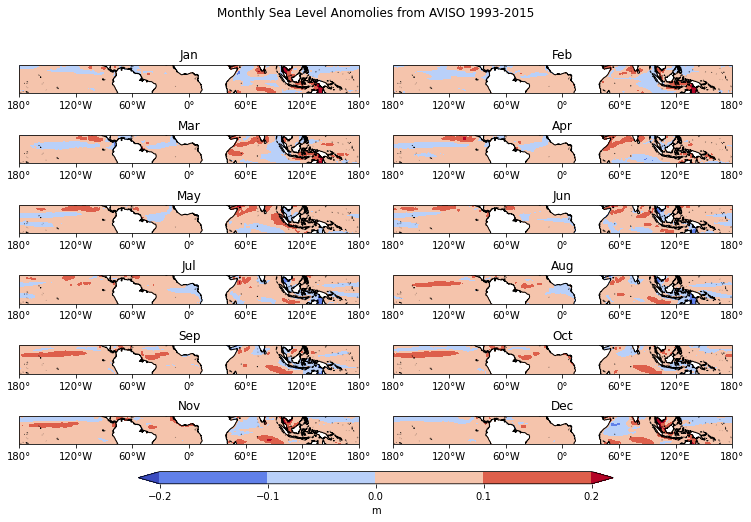

In [7]:
# Define the figure and each axis for the 4 rows and 3 columns
# Rows will be seasons
fig, axs = plt.subplots(nrows=6,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()
month_names= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#Loop over all of the months and plot
for i,months in enumerate(ds_monthly["month"]):

        # Select the month (Dataset months are defined numerically, how can I title and graph?)
        data=ds_monthly['sla'][i]

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds_monthly['longitude'])

        # Contour plot
        clevs=np.arange(-.20,.30,.1)
        cs=axs[i].contourf(lons,ds_monthly['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-15,15,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(month_names[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m')

# Add a big title at the top
plt.suptitle('Monthly Sea Level Anomolies from AVISO 1993-2015')

In [ ]:
ds_monthly['sla'][0]